In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('task3_data.csv')

In [91]:
data

,party_rk,purchase_sum,russian_region_nm,russian_region_cd,timediff_to_msk_hour_cnt,russian_federal_district_cd
0,55379140,125139.99000,Москва,77.0,0.0,1.0
1,262639579,168313.24902,Москва,77.0,0.0,1.0
2,284800800,11406.34000,Москва,77.0,0.0,1.0
3,348241166,226707.76105,Москва,77.0,0.0,1.0
4,260568899,578507.48000,Москва,77.0,0.0,1.0
...,...,...,...,...,...,...
9999,302486129,43246.01000,Москва,77.0,0.0,1.0
10000,268027640,162707.70000,Москва,77.0,0.0,1.0
10001,363000802,78635.54000,Москва,77.0,0.0,1.0
10002,154795224,916835.46000,Москва,77.0,0.0,1.0


In [86]:
l, r = st.quantiles(data.purchase_sum, n=20)[0], st.quantiles(data.purchase_sum, n=20)[-1]

In [93]:
data = data[(data.purchase_sum >= l) & (data.purchase_sum <= r)].reset_index()

In [94]:
data

,index,party_rk,purchase_sum,russian_region_nm,russian_region_cd,timediff_to_msk_hour_cnt,russian_federal_district_cd
0,0,55379140,125139.99000,Москва,77.0,0.0,1.0
1,1,262639579,168313.24902,Москва,77.0,0.0,1.0
2,2,284800800,11406.34000,Москва,77.0,0.0,1.0
3,3,348241166,226707.76105,Москва,77.0,0.0,1.0
4,4,260568899,578507.48000,Москва,77.0,0.0,1.0
...,...,...,...,...,...,...,...
8999,9998,250147358,139905.36000,Москва,77.0,0.0,1.0
9000,9999,302486129,43246.01000,Москва,77.0,0.0,1.0
9001,10000,268027640,162707.70000,Москва,77.0,0.0,1.0
9002,10001,363000802,78635.54000,Москва,77.0,0.0,1.0


In [95]:
import statistics as st

In [96]:
df_per_region = data.groupby('russian_region_nm').purchase_sum.aggregate(['median', 'mean'])

In [97]:
df_per_region

,median,mean
russian_region_nm,,
Алтайский край,23200.000,67948.706102
Амурская область,33770.715,72697.222500
Архангельская область,41749.745,121541.021042
Астраханская область,44875.575,93060.480263
Белгородская область,26091.000,82939.966686
...,...,...
Чеченская республика,23247.000,35970.985938
Чувашская республика,20986.000,65881.171509
Чукотский автономный округ,3750.000,3750.000000


<AxesSubplot: >

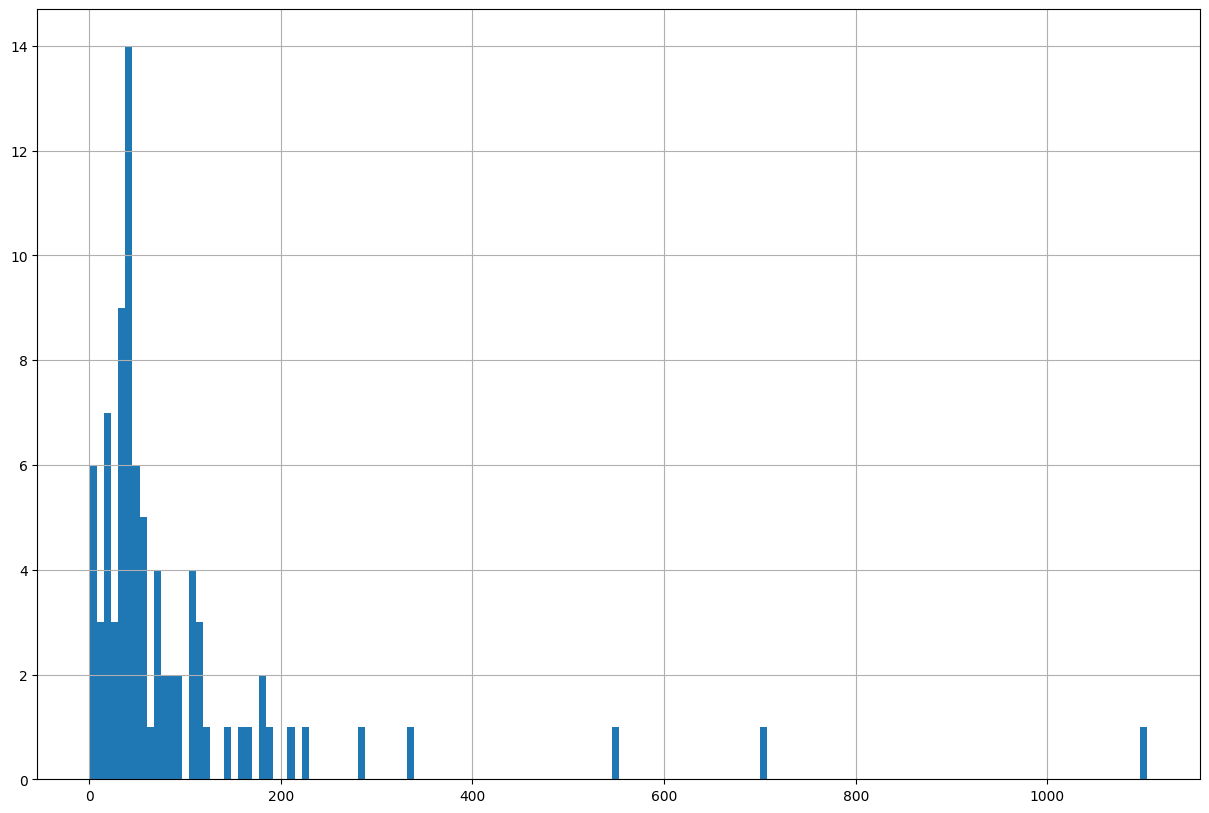

In [98]:
data.groupby('russian_region_nm').count().purchase_sum.hist(bins=150, figsize=(15, 10))

In [99]:
mask = data.groupby('russian_region_nm').count().purchase_sum >= 100

/var/folders/t6/v3xy3qtx59bfzgn3jkylqf0m0000gn/T/ipykernel_26705/1569596517.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_per_region.sort_values('median')[mask].plot(kind='bar', figsize=(15, 10))


<AxesSubplot: xlabel='russian_region_nm'>

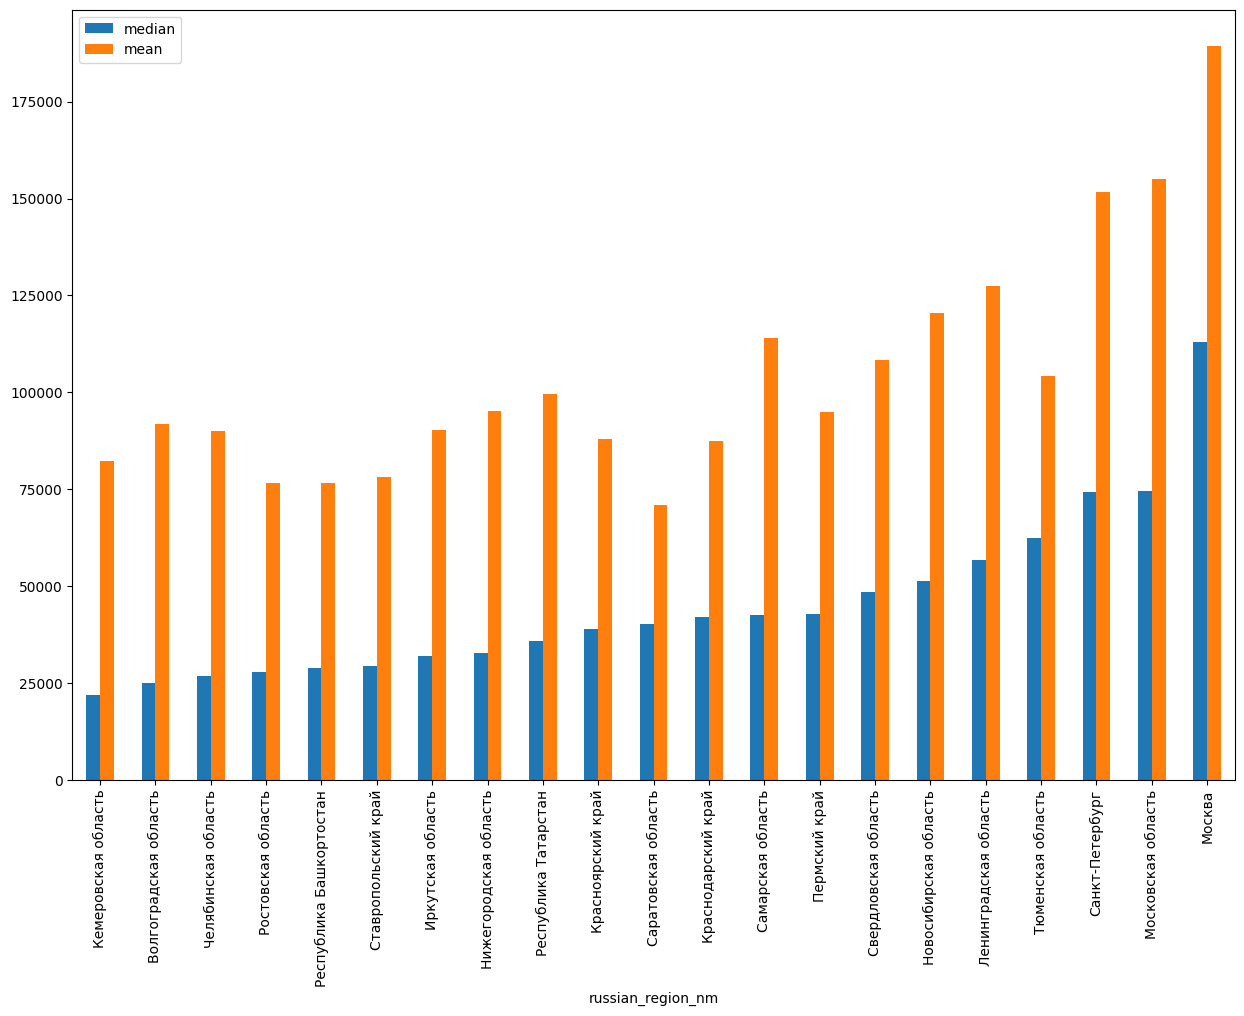

In [100]:
df_per_region.sort_values('median')[mask].plot(kind='bar', figsize=(15, 10))

<AxesSubplot: title={'center': 'purchase_sum'}, xlabel='timediff_to_msk_hour_cnt'>

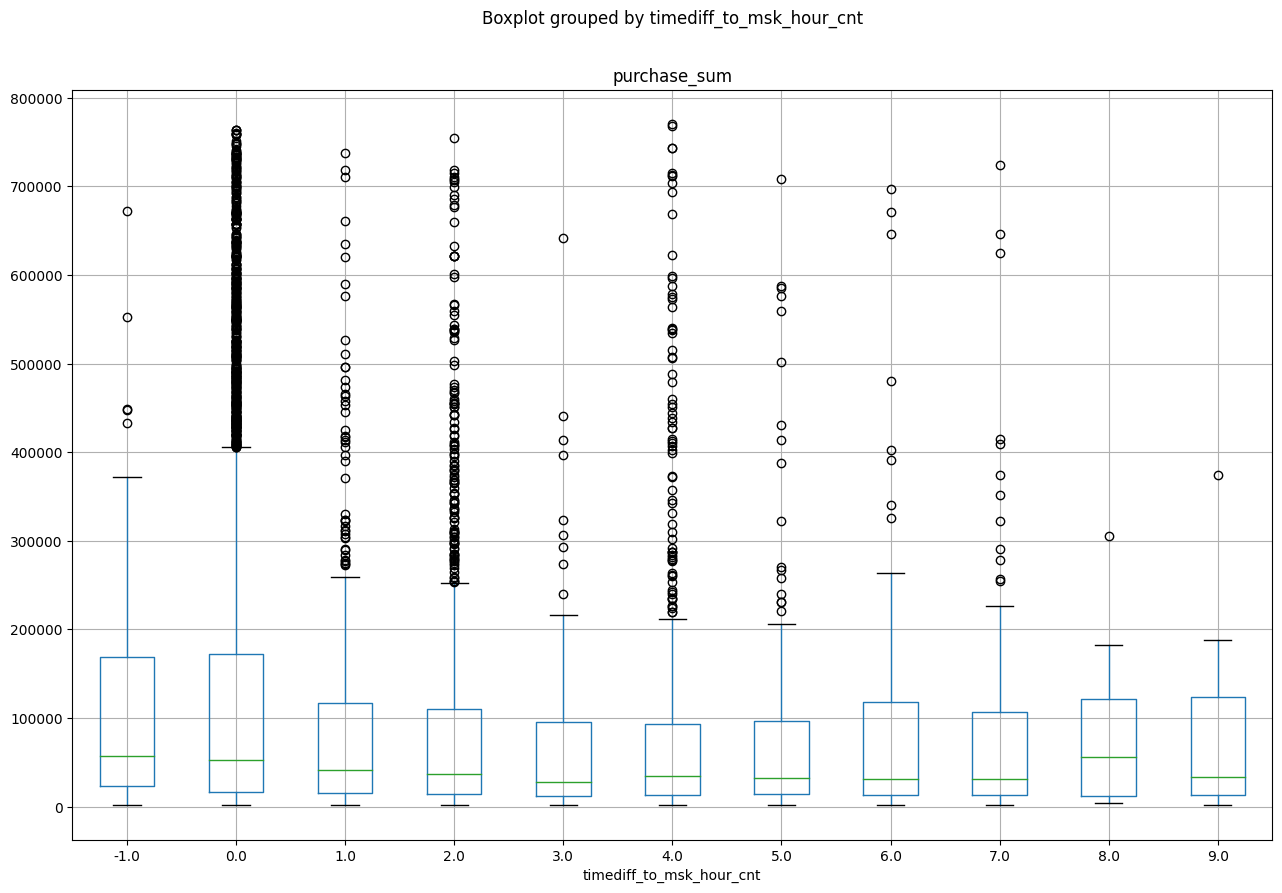

In [119]:
data.boxplot(by='timediff_to_msk_hour_cnt', column='purchase_sum', figsize=(15,10))